In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import dateutil

In [63]:
fr_raw = pd.read_csv(r'..\data\search\peak_finder\Final_Results.csv').dropna(axis=1, how='all')
fr_norm = pd.read_csv(r'..\data\processed\lipidomics_linregress_normalized_data.csv')
fr_filt = pd.read_csv(r'..\data\processed\lipidomics_normalized_filtered_data.csv', index_col=0)
file_grouping = pd.read_csv(r'..\data\metadata\file_grouping.csv', index_col=0)

fr_quant_filenames_in_analytical_order = file_grouping[file_grouping['quant_file'] == True]['fr_name'].to_list()

animals_used = [1091, 1093, 1060, 1062, 1074, 1092, 1102, 1076, 1082, 1101]
diabetic = [1076, 1082, 1101]
impaired = [1060, 1062, 1074, 1092, 1102]
normal = [1091, 1093]
bg_dict = {'diabetic': diabetic, 'impaired': impaired, 'normal': normal}
animal_to_tolerance_dict = {1076: 'diabetic', 1082: 'diabetic',1101: 'diabetic',
                            1060: 'impaired', 1062: 'impaired', 1074: 'impaired', 1092: 'impaired', 1102: 'impaired', 
                            1091: 'normal', 1093: 'normal',}

obs = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='cleaned')
obs['animal'] = obs['animal'].str.strip('TM').astype('int')
obs['datetime'] = obs['when'].apply(dateutil.parser.parse)
animal_phenotypes = pd.read_excel(r'..\data\metadata\20210421_FBGRBGOGTT_Huishi sample sheet.xlsx', sheet_name='animal phenotypes')
animal_phenotypes['animal'] = animal_phenotypes['animal'].str.strip('TM').astype('int')

metab_file_grouping = pd.read_csv(r'..\data\metadata\metabolomics_file_grouping.csv')
tf = pd.read_excel(r'..\data\raw\metabolomics\20210904_KAO_Huishi_HILIC_Tracefinder_peakAreas.xlsx', index_col=0)
tf_metab_cols = tf.columns
tf_quant_filenames = metab_file_grouping[metab_file_grouping['quant_file'] == True]['File Name'].to_list()
########### IMPORTANT, REPLACING ZEROES WITH 1E3 ##################
tf = tf.replace(0, 100)

In [42]:
fg = file_grouping.rename({'rat_label':'animal'}, axis=1).reset_index()
merge_grouping = fg[fg['quant_file'] == True].merge(metab_file_grouping, 
                    left_on=['animal', 'bg_type', 'week', 'quant_file'],
                    right_on=['animal', 'bg_type', 'week', 'quant_file'],
                    suffixes=('_lipid', '_metab'))
merge_grouping

,File Name_lipid,analytical_run_order,fr_name,animal,bg_type,quant_file,week,lipidex_file_number,date,glucose_tolerance_lipid,bg,File Name_metab,analytical_order,fixed_filename,qc_file,blank_file,glucose_tolerance_metab
0,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,7,20210729_AJ_Toh_RatBloodGlucose_T1076M_2021040...,1076.0,FBG,True,10.0,27,2021-04-05,diabetic,71.000000,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,21,20210831_KAO_HILIC_T1076M_20210405_10wk_FBG,False,False,diabetic
1,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,8,20210729_AJ_Toh_RatBloodGlucose_T1062M_2021032...,1062.0,FBG,True,8.0,9,2021-03-22,impaired,52.333333,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,61,20210831_KAO_HILIC_T1062M_20210322_8wk_FBG,False,False,impaired
2,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,9,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021040...,1093.0,FBG,True,9.0,49,2021-04-02,normal,64.000000,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,50,20210831_KAO_HILIC_T1093M_20210402_9wk_FBG,False,False,normal
3,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,10,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021032...,1060.0,RBG,True,8.0,4,2021-03-25,impaired,225.000000,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,59,20210831_KAO_HILIC_T1060M_20210325_8wk_RBG,False,False,impaired
4,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,11,20210729_AJ_Toh_RatBloodGlucose_T1091M_2021041...,1091.0,FBG,True,10.0,39,2021-04-10,normal,48.500000,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,56,20210831_KAO_HILIC_T1091M_20210410_10wk_FBG,False,False,normal
5,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,12,20210729_AJ_Toh_RatBloodGlucose_T1092M_2021040...,1092.0,RBG,True,9.0,44,2021-04-06,impaired,70.500000,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,18,20210831_KAO_HILIC_T1092M_20210406_9wk_RBG,False,False,impaired
6,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,13,20210729_AJ_Toh_RatBloodGlucose_T1093M_2021041...,1093.0,RBG,True,10.0,52,2021-04-13,normal,69.500000,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,45,20210831_KAO_HILIC_T1093M_20210413_10wk_RBG,False,False,normal
7,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,14,20210729_AJ_Toh_RatBloodGlucose_T1082M_2021040...,1082.0,FBG,True,10.0,33,2021-04-05,diabetic,50.000000,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,41,20210831_KAO_HILIC_T1082M_20210405_10wk_FBG,False,False,diabetic
8,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,15,20210729_AJ_Toh_RatBloodGlucose_T1060M_2021040...,1060.0,RBG,True,9.0,6,2021-04-01,impaired,83.000000,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,5,20210831_KAO_HILIC_T1060M_20210401_9wk_RBG,False,False,impaired
9,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,16,20210729_AJ_Toh_RatBloodGlucose_T1101M_2021040...,1101.0,FBG,True,9.0,55,2021-04-02,diabetic,43.000000,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,44,20210831_KAO_HILIC_T1101M_20210402_9wk_FBG,False,False,diabetic


In [6]:
tfcorr = tf.corr('kendall')

<Figure size 1080x1080 with 0 Axes>

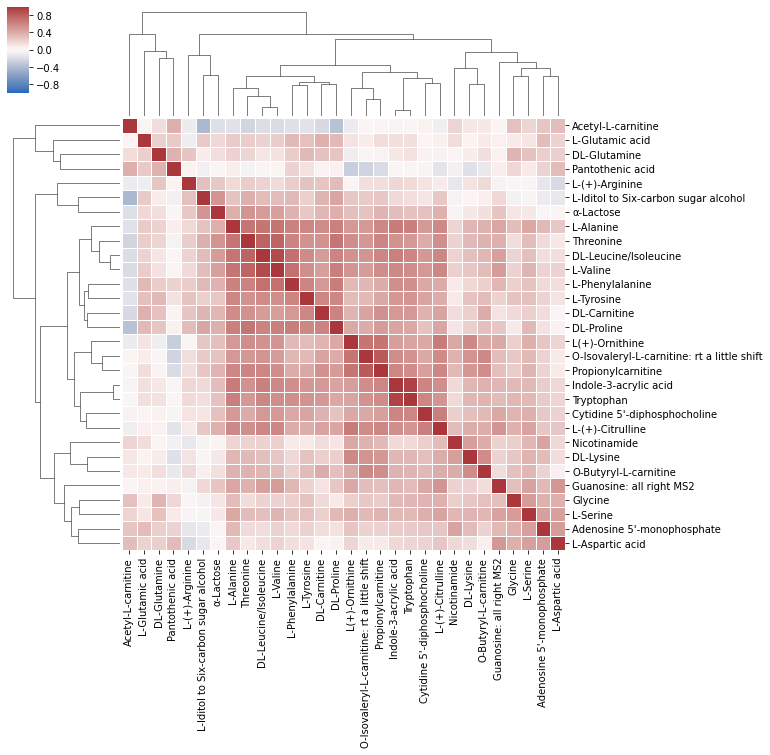

<Figure size 1080x1080 with 0 Axes>

In [11]:
tfhm = sns.clustermap(tfcorr, vmin=-1, vmax=1, annot=False,
                      cmap='vlag', linewidths=0.75)
plt.figure(figsize=(15, 15))

In [72]:
lip_met_map = dict(zip(merge_grouping[ 'File Name_metab'], merge_grouping['fr_name']))
lip_met_map

{'20210831_KAO_HILIC_T1076M_20210405_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1076M_20210405_10wk_FBG.raw (F27)',
 '20210831_KAO_HILIC_T1062M_20210322_8wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9)',
 '20210831_KAO_HILIC_T1093M_20210402_9wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1093M_20210402_9wk_FBG.raw (F49)',
 '20210831_KAO_HILIC_T1060M_20210325_8wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4)',
 '20210831_KAO_HILIC_T1091M_20210410_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1091M_20210410_10wk_FBG.raw (F39)',
 '20210831_KAO_HILIC_T1092M_20210406_9wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1092M_20210406_9wk_RBG.raw (F44)',
 '20210831_KAO_HILIC_T1093M_20210413_10wk_RBG': '20210729_AJ_Toh_RatBloodGlucose_T1093M_20210413_10wk_RBG.raw (F52)',
 '20210831_KAO_HILIC_T1082M_20210405_10wk_FBG': '20210729_AJ_Toh_RatBloodGlucose_T1082M_20210405_10wk_FBG.raw (F33)',
 '20210831_KAO_HILIC_T1060M_20210401_9wk_RBG': '20210729_AJ_Toh_Ra

In [74]:
tft = tf.T
tft = tft[tf_quant_filenames].rename(lip_met_map, axis=1)

In [75]:
fr_filt[fr_quant_filenames_in_analytical_order].append(tft)

C:\Users\ben\Anaconda3\lib\site-packages\pandas\core\frame.py:7123: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort,


,20210729_AJ_Toh_RatBloodGlucose_T1060M_20210322_8wk_FBG.raw (F3),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210325_8wk_RBG.raw (F4),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210329_9wk_FBG.raw (F5),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210401_9wk_RBG.raw (F6),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210405_10wk_FBG.raw (F7),20210729_AJ_Toh_RatBloodGlucose_T1060M_20210408_10wk_RBG.raw (F8),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210322_8wk_FBG.raw (F9),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210325_8wk_RBG.raw (F10),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210329_9wk_FBG_QC2.raw (F12),20210729_AJ_Toh_RatBloodGlucose_T1062M_20210401_9wk_RBG.raw (F14),...,20210729_AJ_Toh_RatBloodGlucose_T1101M_20210402_9wk_FBG.raw (F55),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210406_9wk_RBG.raw (F56),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210410_10wk_FBG.raw (F57),20210729_AJ_Toh_RatBloodGlucose_T1101M_20210413_10wk_RBG.raw (F58),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210327_8wk_FBG.raw (F59),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210330_8wk_RBG.raw (F60),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210402_9wk_FBG.raw (F61),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210406_9wk_RBG.raw (F62),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210410_10wk_FBG.raw (F63),20210729_AJ_Toh_RatBloodGlucose_T1102M_20210413_10wk_RBG.raw (F64)
unknown_679.05463_0.536,9.974970e+06,1.692144e+07,1.258949e+07,2.247304e+07,1.197038e+07,8.914997e+06,1.042187e+07,5.531159e+06,8.637622e+06,1.070997e+07,...,1.156896e+07,9.046158e+06,5.364408e+06,1.615157e+07,1.210451e+07,1.079174e+07,1.185658e+07,9.721337e+06,9.394720e+06,1.111960e+07
unknown_641.1087_0.537,4.024286e+07,5.397037e+07,3.543749e+07,3.485691e+07,1.866727e+07,2.250254e+07,2.518790e+07,1.093399e+07,2.233278e+07,5.986366e+06,...,3.207186e+07,2.406236e+07,2.035223e+07,3.496832e+07,3.013993e+07,4.966627e+06,3.181116e+07,2.802334e+07,2.191732e+07,2.338934e+07
unknown_951.15973_0.541,1.411587e+07,3.166872e+07,1.871277e+07,9.434457e+06,1.050696e+07,1.747228e+07,1.392568e+07,9.971310e+06,1.047942e+07,1.680713e+07,...,1.690386e+07,1.185835e+07,1.125893e+07,1.431970e+07,1.401550e+07,9.622362e+06,1.533037e+07,1.460625e+07,1.344883e+07,1.259183e+07
unknown_329.03067_0.542,1.100528e+08,6.605294e+07,1.567150e+08,2.032554e+08,1.272289e+08,1.598825e+08,1.177918e+08,1.261985e+08,1.106186e+08,1.560455e+08,...,1.465332e+08,1.474987e+08,1.043309e+08,2.587329e+08,8.100482e+07,1.108561e+08,1.279825e+08,1.603498e+08,1.173300e+08,1.308413e+08
unknown_969.13147_0.544,9.488360e+06,1.661334e+07,1.098442e+07,5.525663e+06,6.225248e+06,8.111235e+06,6.859485e+06,4.907544e+06,6.715357e+06,9.316513e+06,...,6.829185e+06,7.136770e+06,5.199019e+06,6.029466e+06,5.975402e+06,3.492394e+06,8.607944e+06,7.868903e+06,5.873010e+06,7.439766e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Pantothenic acid,3.204091e+05,3.821964e+05,3.822636e+05,1.040698e+05,3.523724e+05,2.500868e+05,4.502832e+05,2.746906e+05,4.759069e+05,2.521095e+05,...,3.535162e+05,2.760491e+05,4.327206e+05,2.333021e+05,4.864683e+05,2.140895e+05,3.520767e+05,1.905650e+05,4.219182e+05,2.147182e+05
Propionylcarnitine,8.654783e+05,3.873891e+06,1.440361e+06,3.705988e+06,1.109936e+06,4.846842e+06,1.217982e+06,5.833070e+06,1.359814e+06,5.107934e+06,...,1.558649e+06,5.562981e+06,1.824540e+06,6.262017e+06,1.421424e+06,7.893304e+06,1.253382e+06,7.350783e+06,1.975672e+06,5.450658e+06
Threonine,1.411869e+07,2.654928e+07,1.617336e+07,2.263090e+07,1.204391e+07,2.918362e+07,2.137381e+07,3.562421e+07,1.731824e+07,3.796274e+07,...,1.809722e+07,3.217850e+07,1.715445e+07,3.059467e+07,1.655164e+07,3.455798e+07,1.611318e+07,3.302676e+07,1.574682e+07,2.630035e+07
Tryptophan,2.932663e+06,5.610199e+06,4.171967e+06,4.746413e+06,4.744327e+06,6.234668e+06,3.837283e+06,6.623018e+06,4.400262e+06,7.960955e+06,...,5.481754e+06,5.704763e+06,6.588679e+06,4.802897e+06,4.369452e+06,5.978257e+06,4.847306e+06,6.498828e+06,5.787762e+06,6.488539e+06
